In [1]:
#!pip show fastai
#!pip install fastai --upgrade

     |████████████████████████████████| 194kB 13.6MB/s 
     |████████████████████████████████| 776.8MB 20kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 12.8MB 41.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [1]:
#from fastai.vision.all import *
from fastai.vision.all import *
import pandas as pd
import sys
sys.path.insert(0,'/content/chexpert/models/')
import cam
import util_old

In [2]:
dls, labels = util_old.chexpert_data_loader(img_size=256, bs=32)

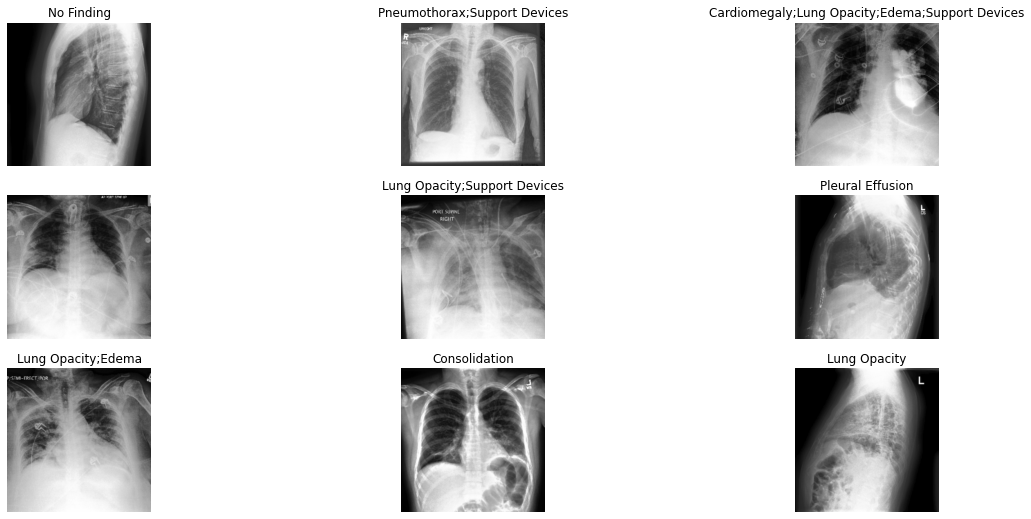

In [3]:
dls.show_batch(max_n=9, figsize=(20,9))

-------Running unconditional-------


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.377703,0.369774,[0.5293247 0.84054475 0.77391965 0.74350733 0.76758799 0.72133277 0.84923328 0.66333985 0.54156828 0.66730539 0.8489982 0.52149918 0.79820765 0.60019795],0.701215,18:25


Better model found at epoch 0 with valid_loss value: 0.36977386474609375.


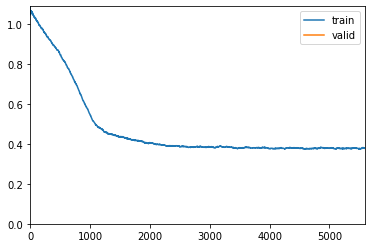

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.370702,0.366619,[0.47891005 0.85533793 0.78611659 0.76692247 0.75437226 0.7429889 0.85950214 0.75906163 0.65162674 0.69018378 0.8597649 0.68140283 0.83992987 0.63601662],0.737649,22:54
1,0.366961,0.365985,[0.41658361 0.85729279 0.78198078 0.77063373 0.79346594 0.74381867 0.86253002 0.76028774 0.59952935 0.69690531 0.86297367 0.61678748 0.80863428 0.67262403],0.728416,22:26
2,0.368705,0.365594,[0.46041168 0.85808627 0.79423344 0.77255833 0.7371343 0.74769609 0.86180199 0.73301212 0.67660906 0.69822256 0.86462649 0.49691521 0.78378122 0.66374557],0.721121,22:21
3,0.369602,0.364775,[0.39683946 0.86266444 0.79769498 0.7728613 0.76018096 0.75017016 0.86386613 0.73764174 0.69062581 0.70557774 0.86490125 0.52675395 0.83453164 0.66908643],0.727248,22:38
4,0.362904,0.364644,[0.40611796 0.86113453 0.79342218 0.7780525 0.74782848 0.75230954 0.8624126 0.75784855 0.64286121 0.702845 0.86349844 0.63719191 0.74539995 0.67784201],0.727035,22:33
5,0.358743,0.365470,[0.37470203 0.85904459 0.79644301 0.77672563 0.75532636 0.74684872 0.85919131 0.7627394 0.64572747 0.70239965 0.86295104 0.53564187 0.79316408 0.6799029 ],0.721148,22:31
6,0.356426,0.367855,[0.4280259 0.85536655 0.79406226 0.77150807 0.75725157 0.74323484 0.85647342 0.74719321 0.67016501 0.69443142 0.85721091 0.70211563 0.83035386 0.67475747],0.739034,22:23
7,0.348795,0.372163,[0.42233323 0.84425389 0.78695358 0.7615581 0.73390882 0.73292166 0.84895619 0.72485893 0.64023459 0.67815445 0.84780588 0.6463845 0.8003659 0.67413471],0.721594,22:17
8,0.341987,0.375213,[0.42055251 0.83497562 0.78057014 0.76494328 0.73290651 0.72702974 0.84215094 0.72696061 0.635684 0.66396379 0.84230967 0.62326566 0.80047423 0.66594189],0.715968,22:17
9,0.340073,0.377787,[0.42741775 0.83521009 0.78114394 0.76252043 0.73321584 0.72562241 0.8402297 0.71892865 0.63354775 0.66432471 0.83982357 0.61295638 0.79903193 0.65999232],0.713930,22:29


Better model found at epoch 0 with valid_loss value: 0.3666193187236786.


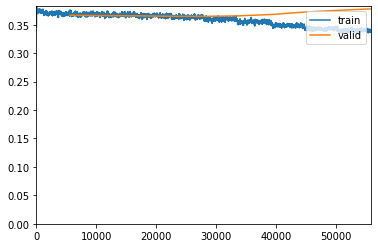

Better model found at epoch 1 with valid_loss value: 0.3659852147102356.
Better model found at epoch 2 with valid_loss value: 0.3655942976474762.
Better model found at epoch 3 with valid_loss value: 0.36477532982826233.
Better model found at epoch 4 with valid_loss value: 0.3646436929702759.
Epoch 5: reducing lr to 6.113034146626898e-05
Epoch 6: reducing lr to 3.88784765310173e-05
Epoch 7: reducing lr to 1.882945992444838e-05
Epoch 8: reducing lr to 4.954249368981263e-06
Epoch 9: reducing lr to 1.0001613281714409e-09


In [6]:
# Next train unconditionally for only transfer learning
print('-------Running unconditional-------')
chexpert_learner_unconditional = util_old.ChexpertLearner(dls, densenet121, n_out=len(labels), y_range=(0, 1),
                                        loss_func=nn.BCELoss(),
                                        metrics=[RocAucMulti(average=None),
                                                 RocAucMulti(average='weighted')])
chexpert_learner_unconditional
chexpert_learner_unconditional.learn_model(use_saved=False, train_saved=False, epochs=10)

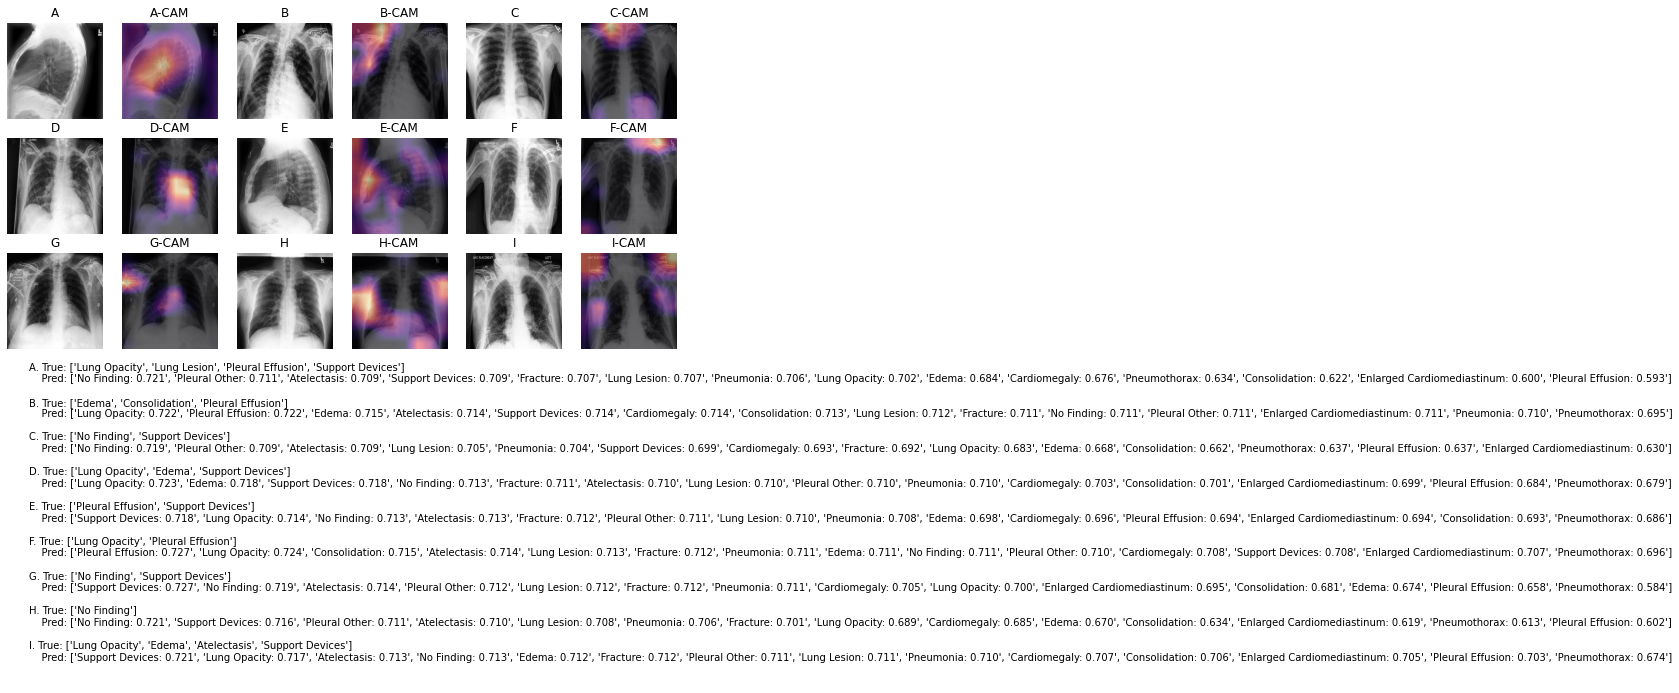

In [7]:
chexpert_learner = chexpert_learner_unconditional
cam.plot_cam(chexpert_learner.learn)